In [128]:
import torch
import torch.nn as nn
import torch.nn.functional as Fn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

class Model(nn.Module):
    def __init__(self, in_features=2, hidden1=4, hidden2=3, out_features=1):
        super().__init__()
        self.Layer_1 = nn.Linear(in_features, hidden1)
        self.Layer_2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = Fn.relu(self.Layer_1(x))
        x = Fn.relu(self.Layer_2(x))
        x = torch.sigmoid(self.out(x))

        return x

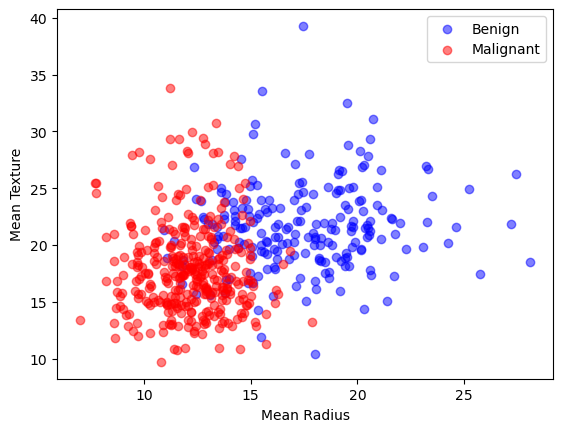

Epoch: 0 | Loss: 1.0906128883361816 | Test Loss: 0.8280192017555237
Epoch: 1 | Loss: 0.8162102103233337 | Test Loss: 0.7131158709526062
Epoch: 2 | Loss: 0.7063755989074707 | Test Loss: 0.6715269684791565
Epoch: 3 | Loss: 0.6673207879066467 | Test Loss: 0.6565241813659668
Epoch: 4 | Loss: 0.6537327766418457 | Test Loss: 0.6507513523101807
Epoch: 5 | Loss: 0.6488301157951355 | Test Loss: 0.6482660174369812
Epoch: 6 | Loss: 0.646900475025177 | Test Loss: 0.6470171213150024
Epoch: 7 | Loss: 0.6460255980491638 | Test Loss: 0.6461995244026184
Epoch: 8 | Loss: 0.6454626321792603 | Test Loss: 0.6455448865890503
Epoch: 9 | Loss: 0.6450097560882568 | Test Loss: 0.6449768543243408
Epoch: 10 | Loss: 0.6446012854576111 | Test Loss: 0.6444534063339233
Epoch: 11 | Loss: 0.6442223191261292 | Test Loss: 0.6439322829246521
Epoch: 12 | Loss: 0.6438275575637817 | Test Loss: 0.643395721912384
Epoch: 13 | Loss: 0.6434197425842285 | Test Loss: 0.642839252948761
Epoch: 14 | Loss: 0.642980694770813 | Test Loss

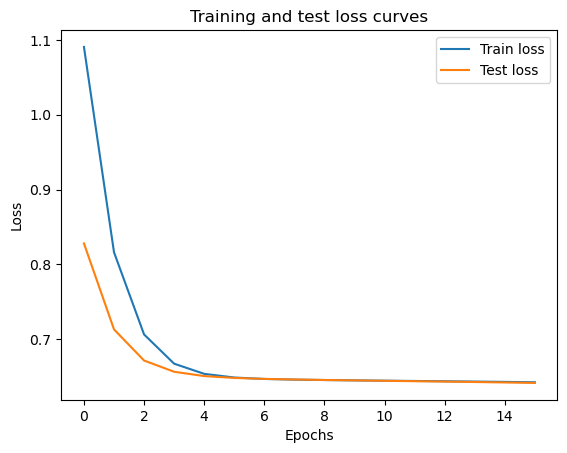

In [150]:
model = Model()

data = load_breast_cancer()
X, y = data.data, data.target

X_selected = X[:, [0, 1]]

plt.scatter(X_selected[y == 0, 0], X_selected[y == 0, 1], color='blue', label='Benign', alpha=0.5)
plt.scatter(X_selected[y == 1, 0], X_selected[y == 1, 1], color='red', label='Malignant', alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

#Linear model can't work with this data

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

torch.manual_seed(42)

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

epochs = 16
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())

    model.eval()
    with torch.inference_mode():
        test_preds = model(X_test)
        test_loss = loss_fn(test_preds, y_test)
        test_loss_values.append(test_loss.item())

    epoch_count.append(epoch)

    if epoch % 1 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item()} | Test Loss: {test_loss.item()}")


y_preds_bin = (test_preds > 0.5).float()
print(f"Accuracy: {accuracy_score(y_test, y_preds_bin):.2f}")

plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()